<a href="https://colab.research.google.com/github/kiar24/datasci_223/blob/Final-Project/FinalProjectSubmission223.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#https://www.geeksforgeeks.org/how-to-import-kaggle-datasets-directly-into-google-colab/
#download opendatasets to download kaggle dataset, pandas as well
#On kaggle account - go to settings, scroll down click new API token, and download kaggle.json - open it up and store username and password
%pip install opendatasets
%pip install pandas PIL numpy scikit-learn
import opendatasets as od
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedKFold, ParameterGrid, KFold

ERROR: Could not find a version that satisfies the requirement PIL (from versions: none)
ERROR: No matching distribution found for PIL


In [ ]:
#the following dataset is used - download if not working to see, but when you run download provide username and password from kaggle.json earlier
od.download(
    "https://www.kaggle.com/datasets/jonathanoheix/face-expression-recognition-dataset"
)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: taimoorqureshi
Your Kaggle Key: ··········


100%|██████████| 121M/121M [00:03<00:00, 34.9MB/s]


In [ ]:
from PIL import Image
import os

# Path to the folder in dir containing image
folder_path = "face-expression-recognition-dataset/images/train/angry"

# Name of the image file - example
image_name = "0.jpg"

# Construct the full path to the image
image_path = os.path.join(folder_path, image_name)

# Open the image
image = Image.open(image_path)

# Get the dimensions of the image
width, height = image.size

# If the image is in color, get the number of channels
if image.mode == "RGB":
    channels = 3
elif image.mode == "RGBA":
    channels = 4
else:
    channels = 1

print("Image shape:", width, "x", height, "x", channels)


Image shape: 48 x 48 x 1


In [ ]:
import os

# Get the current working directory
current_directory = os.getcwd()

print("Current working directory:", current_directory)


Current working directory: /content


In [ ]:
import os
from PIL import Image
import numpy as np
import pandas as pd
from sklearn.utils import shuffle


#Function for all images,
#Using Image.open from PIL, open image from provided path
def load_image(image_path):
    with Image.open(image_path) as img: #convert to RGB and size to 28 by 28. Converts to numpy array and flattens to 1 Dimension array.
        img = img.convert('RGB').resize((28, 28))
        return np.array(img).flatten()

# Initialize lists to store image data and labels
images = []
labels = []

# Traverse directories inside train folder of dataset using os and then within that go through each image in each emotion folder, assign image to image folder
for emotion in os.listdir('face-expression-recognition-dataset/images/train'):
    emotion_path = os.path.join('face-expression-recognition-dataset/images/train', emotion)
    if os.path.isdir(emotion_path):
        for image in os.listdir(emotion_path):
            image_path = os.path.join(emotion_path, image)
            if os.path.isfile(image_path):
                # Load image, scale and tune it to requirements using function load_image above, and append to existing images column
                image_data = load_image(image_path)
                images.append(image_data)
                # Use the folder name (emotion) for the label column - append to it like images
                labels.append(emotion)

# Convert lists to numpy arrays
images = np.array(images)
labels = np.array(labels)

# Randomize the order of the images and labels
images, labels = shuffle(images, labels, random_state=42)

In [ ]:
print(labels)


['surprise' 'surprise' 'happy' ... 'sad' 'neutral' 'surprise']


In [ ]:
# Flatten the image data
flattened_images = [image.flatten() for image in images]

# Create DataFrame with pandas
Emotion_image = pd.DataFrame()
Emotion_image['label'] = labels
Emotion_image['image'] = flattened_images

In [ ]:
print(Emotion_image)
#unique length of values in image column - only one
print(Emotion_image['image'].apply(len).unique())

          label                                              image
0      surprise  [255, 255, 255, 254, 254, 254, 254, 254, 254, ...
1      surprise  [211, 211, 211, 216, 216, 216, 217, 217, 217, ...
2         happy  [211, 211, 211, 139, 139, 139, 129, 129, 129, ...
3         happy  [56, 56, 56, 58, 58, 58, 58, 58, 58, 62, 62, 6...
4         angry  [37, 37, 37, 48, 48, 48, 61, 61, 61, 43, 43, 4...
...         ...                                                ...
28816  surprise  [251, 251, 251, 254, 254, 254, 247, 247, 247, ...
28817     happy  [202, 202, 202, 206, 206, 206, 225, 225, 225, ...
28818       sad  [187, 187, 187, 143, 143, 143, 153, 153, 153, ...
28819   neutral  [10, 10, 10, 7, 7, 7, 9, 9, 9, 10, 10, 10, 14,...
28820  surprise  [229, 229, 229, 230, 230, 230, 231, 231, 231, ...

[28821 rows x 2 columns]
[2352]


In [ ]:
#Mapping is used to assign the emotions (from column in train_image) to either positive or negative emotion (Binary)
emotion_binarymapping = {
    'happy': 'Positive',
    'surprise': 'Positive',
    'neutral': 'Positive',
    'angry': 'Negative',
    'disgust': 'Negative',
    'fear': 'Negative',
    'sad': 'Negative',
}

#label column is mapped as above to positive or negative and then made 0 or 1 for purposes of binary classification
Emotion_image['emotion_binary'] = Emotion_image['label'].map(emotion_binarymapping)
Emotion_image['emotion_binary'] = Emotion_image['emotion_binary'].map({'Positive': 1, 'Negative': 0})


In [ ]:
print(Emotion_image['emotion_binary'])
#count values of positive (1) or negative (0)
print(Emotion_image['emotion_binary'].value_counts())


0        1
1        1
2        1
3        1
4        0
        ..
28816    1
28817    1
28818    0
28819    1
28820    1
Name: emotion_binary, Length: 28821, dtype: int64
1    15351
0    13470
Name: emotion_binary, dtype: int64


In [ ]:
#%pip install tensorflow
#%pip install keras
import sklearn.model_selection
import numpy as np

#Input and output columns
X = np.array(Emotion_image['image'].tolist())/255.0 #Normalize
Y = Emotion_image['emotion_binary'].values #values for numpy array!

# Split the data into training and testing sets with better randomness after shuffling earlier
Input_train, Input_test, Output_train, Output_test = train_test_split(X, Y, test_size=0.3, random_state=20)


In [ ]:
print(Input_train)
print(Output_train)



[[0.35686275 0.35686275 0.35686275 ... 0.66666667 0.66666667 0.66666667]
 [0.67843137 0.67843137 0.67843137 ... 0.90196078 0.90196078 0.90196078]
 [0.18431373 0.18431373 0.18431373 ... 0.30588235 0.30588235 0.30588235]
 ...
 [0.30980392 0.30980392 0.30980392 ... 0.88235294 0.88235294 0.88235294]
 [0.88235294 0.88235294 0.88235294 ... 1.         1.         1.        ]
 [0.45098039 0.45098039 0.45098039 ... 0.18039216 0.18039216 0.18039216]]
[0 1 1 ... 1 1 0]


In [ ]:
#Output_train = np.array([1 if label == 'Positive' else 0 for label in Output_train])
print(Output_train)
Output_train.shape

#input_size = 784
#Input_train = np.array([np.resize(image, input_size) for image in images])
#Output_train = np.array([np.resize(image, input_size) for image in images])

[0 1 1 ... 1 1 0]


(20174,)

In [ ]:
print(Input_train.shape)
print(Output_train.shape)
print(type(Input_train))
print(type(Output_train))
print(Input_train.dtype)
print(Output_train.dtype)

(20174, 2352)
(20174,)
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
float64
int64


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Reshape, Dropout
from keras.regularizers import l2


input_size = 2352 # images are 28x28
hidden_size = 16  # parameter for the hidden layer (careful tuning this because overfitting)
num_classes = 1 #Binary classifaction! For sigmoidal, it can be assigned either 0 or 1


#Sequential - add layers (RelU is used)
NN_model = Sequential([
    Dense(64, activation='relu', input_shape=(input_size,)),
    Dense(64, activation='relu'),
    Dense(num_classes, activation='sigmoid')
])

#Loss function is binary_crossentropy because binary classification, adam is good optimizer. Accuracy metric
NN_model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

#Fit model - 400 batch size at a time for 20 epochs
NN_model.fit(Input_train, Output_train, batch_size=400, epochs=20)

Epoch 1/20
51/51 [==============================] - 2s 18ms/step - loss: 0.7112 - accuracy: 0.5451
Epoch 2/20
51/51 [==============================] - 1s 15ms/step - loss: 0.6804 - accuracy: 0.5626
Epoch 3/20
51/51 [==============================] - 1s 11ms/step - loss: 0.6752 - accuracy: 0.5781
Epoch 4/20
51/51 [==============================] - 1s 10ms/step - loss: 0.6696 - accuracy: 0.5905
Epoch 5/20
51/51 [==============================] - 1s 11ms/step - loss: 0.6714 - accuracy: 0.5853
Epoch 6/20
51/51 [==============================] - 1s 11ms/step - loss: 0.6695 - accuracy: 0.5879
Epoch 7/20
51/51 [==============================] - 1s 11ms/step - loss: 0.6661 - accuracy: 0.5984
Epoch 8/20
51/51 [==============================] - 1s 11ms/step - loss: 0.6628 - accuracy: 0.6007
Epoch 9/20
51/51 [==============================] - 1s 10ms/step - loss: 0.6574 - accuracy: 0.6111
Epoch 10/20
51/51 [==============================] - 1s 11ms/step - loss: 0.6573 - accuracy: 0.6090
Epoch 11/

In [ ]:
Output_test

array([1, 1, 1, ..., 1, 1, 0])

In [ ]:
#Model evaluation - validation set

#Print loss and accuracy (then print rounded)
test_loss, test_accuracy = NN_model.evaluate(Input_test, Output_test)
print(f"Validation loss: {test_loss:.2f}")
print(f"Validation accuracy: {test_accuracy:.2f}")

#predict on input test
predictimage = NN_model.predict(Input_test)
#predictimage = predictimage.flatten()
#predictimage = [0 if prob < 0.5 else 1 for prob in predictimage]
print(predictimage)

271/271 [==============================] - 1s 2ms/step - loss: 0.6671 - accuracy: 0.5954
Validation loss: 0.67
Validation accuracy: 0.60
271/271 [==============================] - 1s 2ms/step
[[0.39781666]
 [0.3535517 ]
 [0.25617355]
 ...
 [0.26570514]
 [0.4194488 ]
 [0.2475927 ]]


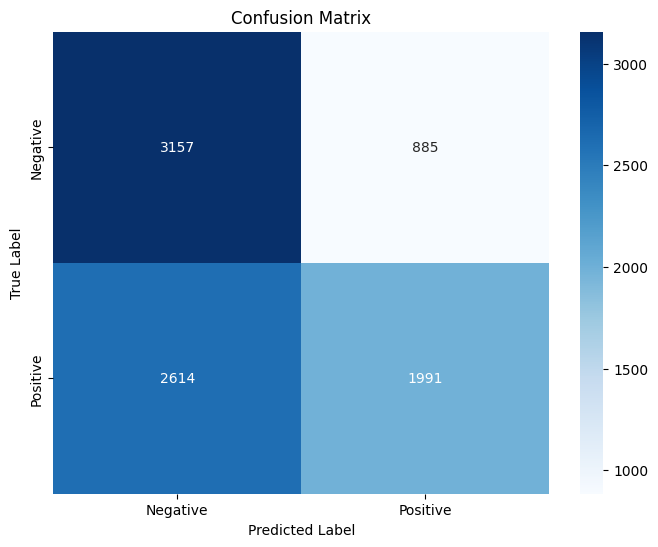

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Convert predicted probabilities to binary predictions
predicted_labels = [1 if prob > 0.5 else 0 for prob in predictimage]

# Calculate the confusion matrix - true value Output_test vs the predict functions predicted_labels (using predictimage and then converting probabilities to 0 and 1)
conf_matrix = confusion_matrix(Output_test, predicted_labels)

# Plot the confusion matrix - Negative and Positives are 0s and 1s
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


271/271 [==============================] - 0s 2ms/step


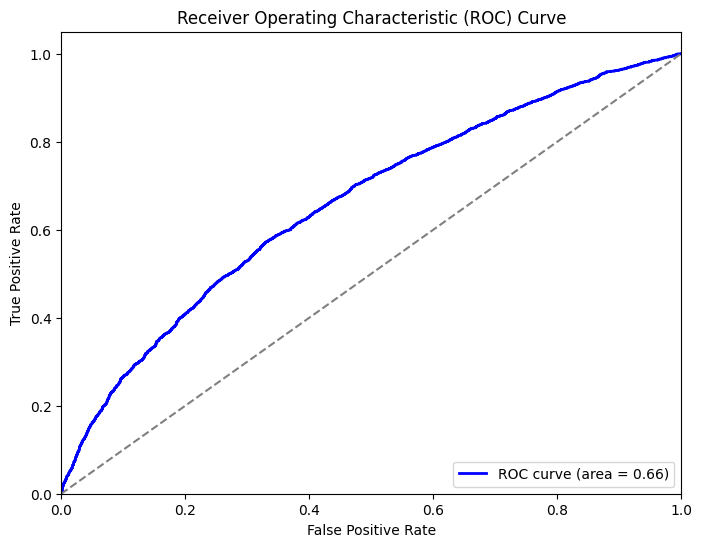

In [ ]:
from sklearn.metrics import roc_curve, auc


# Predict probabilities for the test set
predicted_probs = NN_model.predict(Input_test)

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(Output_test, predicted_probs)

# Calculate the area under the ROC curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

1/1 [==============================] - 0s 30ms/step
[[0.47775823]
 [0.5807615 ]
 [0.34875035]
 [0.3628946 ]
 [0.644202  ]]


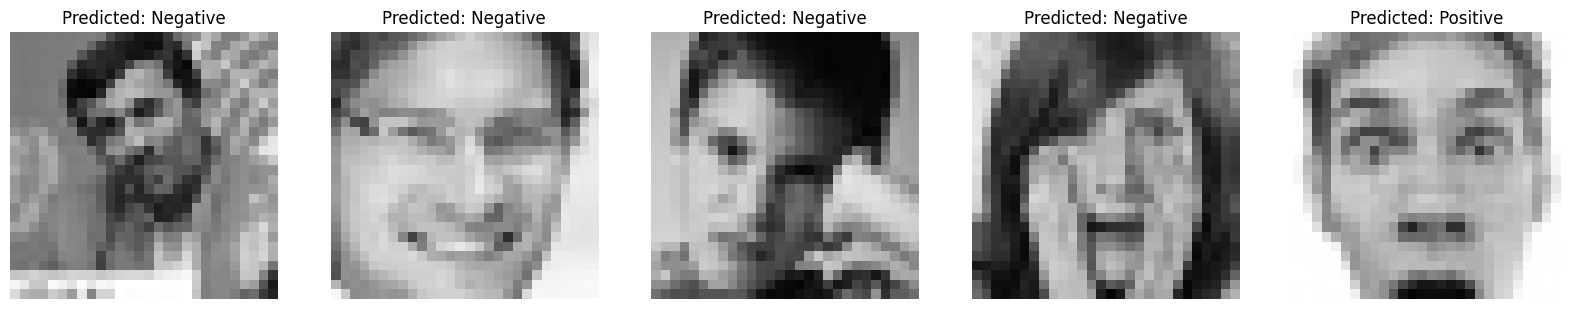

In [ ]:
import matplotlib.pyplot as plt
import random

# Choose a random sample of images from the testing dataset
num_examples = 5
random_indices = random.sample(range(len(Input_test)), num_examples)

# Predict outputs for the selected images
predicted_outputs = NN_model.predict(Input_test[random_indices])

print(predicted_outputs)

# Define a mapping for binary outputs to emotions
binary_to_emotion = {1: 'Positive', 0: 'Negative'}

# Define figure size and spacing
plt.figure(figsize=(20, 5))
# plt.subplots_adjust(wspace=0.5)  # Adjust spacing between subplots

# Display the example images along with their predicted outputs
for i, idx in enumerate(random_indices):
    # Convert predicted output to binary label
    predicted_label = 1 if predicted_outputs[i] > 0.6 else 0
    # Map binary label to emotion
    predicted_emotion = binary_to_emotion[predicted_label]

    plt.subplot(1, num_examples, i + 1)
    plt.imshow(Input_test[idx].reshape(28, 28, 3))
    plt.title(f"Predicted: {predicted_emotion}")
    plt.axis('off')

plt.show()



Invalid image shape
